# FLIGHT PRICE PREDICTION

In [1]:
# Importing the required libraries
import pandas as pd   # linear algebra
import numpy as np   # data processing
import  matplotlib.pyplot as plt   # data visualization
import seaborn as sns   # data visualization, styling and customization
%matplotlib inline

In [2]:
# Reading the train and test datasets
train_df = pd.read_excel('Data_Train0.xlsx')
test_df = pd.read_excel('Test_Set.xlsx')

In [3]:
# Shape of the train dataset
train_df.shape

(10682, 11)

In [4]:
# Displaying first 5 rows of the train dataset
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Shape of the test dataset
test_df.shape

(2671, 10)

In [6]:
# Displaying first 5 rows of the test dataset
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
# Combining the train and test dataset in a new dataframe
big_df  = train_df.append(test_df,sort=False)

In [8]:
# Shape of the combined dataset
big_df.shape

(13353, 11)

In [9]:
# Displaying first 5 rows of the combined dataset
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [10]:
# Displaying last 5 rows of the combined dataset
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [11]:
# Displaying column types for the combined dataset
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [12]:
# Calculating the computer memory used by dataframe in bytes
used_pc_memory = big_df.memory_usage(deep=True).sum()
used_pc_memory = used_pc_memory/(1000*1000)
print('This data frame is using {0:.2f} MB computer memory'.format(used_pc_memory))

This data frame is using 9.46 MB computer memory


## Feature Engineering

In [13]:
# From description we can see that Date_of_Journey is a object data type, 
# Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
# For this we split the given Date_of_Journey into Date, Month and Year 

big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [14]:
# Since we have converted Date_of_Journey column into integers, we drop it.
big_df = big_df.drop(['Date_of_Journey'],axis=1)

In [15]:
# Also, the datatype for the Date, Month and Year columns is changed from object to int.
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [16]:
# Displaying the updated datatypes for the combined dataset.
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [17]:
# Replace value 'non-stop' with '0 stop' in column Total_Stops
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop','0 stop')
# Extract the numerical part by splitting the value
big_df['Total_Stops'] = big_df['Total_Stops'].str.split(' ').str[0]
# Change the column datatype from object to int 
big_df['Total_Stops'] = big_df['Total_Stops'].astype('int')
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [18]:
# Split and retrieve the value of hours and minutes from Arrival_Time column
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]
big_df['Arrival_Hour'] = big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'].str.split(':').str[1]
# Change the column datatype from object to int 
big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype('int')
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype('int')
big_df = big_df.drop(['Arrival_Time'],axis=1)

In [19]:
# Split and retrieve the value of hours and minutes from Dep_Time column
big_df['Departure_Hour'] = big_df['Dep_Time'].str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'].str.split(':').str[1]
# Change the column datatype from object to int 
big_df['Departure_Hour'] = big_df['Departure_Hour'].astype('int')
big_df['Departure_Minute'] = big_df['Departure_Minute'].astype('int')
big_df = big_df.drop(['Dep_Time'],axis=1)

In [20]:
# Displaying the updated datatypes for the combined dataset.
big_df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops           int32
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
dtype: object

In [21]:
# Check for null values
big_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
dtype: int64

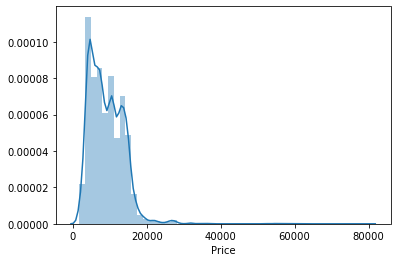

In [22]:
# Display distribution plot to analyze variation in price
sns.distplot(big_df['Price'])

In [23]:
# Calculate mean value of price in train data
train_df.mean()

Price    9087.214567
dtype: float64

In [24]:
# Calculate the measures of centrality for combined data.
big_df['Price'].mean(),big_df['Price'].max(),big_df['Price'].median(),big_df['Price'].mode()

(9087.21456656057,
 79512.0,
 8372.0,
 0    10262.0
 dtype: float64)

In [25]:
# Fill null values with median value of price
big_df['Price'].fillna(big_df['Price'].median(),inplace=True)

In [26]:
#  Check for null values, if any
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
dtype: int64

In [27]:
# Drop the Route column from the dataset
big_df.drop(['Route'],axis=1,inplace=True)

In [28]:
# Split the duration column in hrs and mins
big_df[['hrs','mins']] = big_df['Duration'].str.split(expand=True)

In [29]:
# Calculate total flight duration in minutes
big_df['hrs'].replace(to_replace = 'h', value = '', regex = True, inplace= True)
big_df['hrs'] = pd.to_numeric(big_df['hrs'])

big_df['mins'] = big_df['mins'].fillna(value=0)
big_df['mins'].replace(to_replace ='m', value = '', regex = True, inplace= True)
big_df['mins'] = pd.to_numeric(big_df['mins'])

big_df['Dur_in_mins'] = (big_df['hrs']*60) + big_df['mins']
big_df['Dur_in_mins']

0        170
1        445
2       1140
3        325
4        285
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Dur_in_mins, Length: 13353, dtype: int64

In [30]:
# Remove the Duration column from the dataset.
big_df.drop(['Duration'],axis=1,inplace=True)

In [31]:
# Display the first 5 rows of the updated combined dataset
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,hrs,mins,Dur_in_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4,45,285


In [32]:
# Displaying the updated datatypes for the combined dataset.
big_df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int32
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
hrs                   int64
mins                  int64
Dur_in_mins           int64
dtype: object

## DATA VISUALIZATION

### Number of flights recorded for each Airline

In [33]:
# Number of flights for each Airline in the dataset
flight_count = big_df['Airline'].value_counts()
flight_count

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

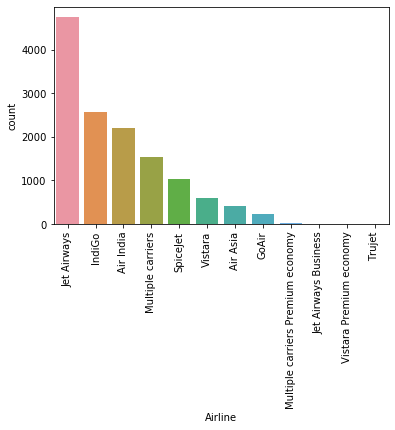

In [34]:
# Countplot to analyze the distribution of flights for Airlines in the dataset.
sns.countplot(x='Airline',data=big_df, order = flight_count.index)
plt.xticks(rotation = 90)
plt.show()

#### Inference :
The maximum number of flights in the dataset are for the Airline Jet Airways, followed by IndiGo and Air India.

### Comparing flight Price to Airline

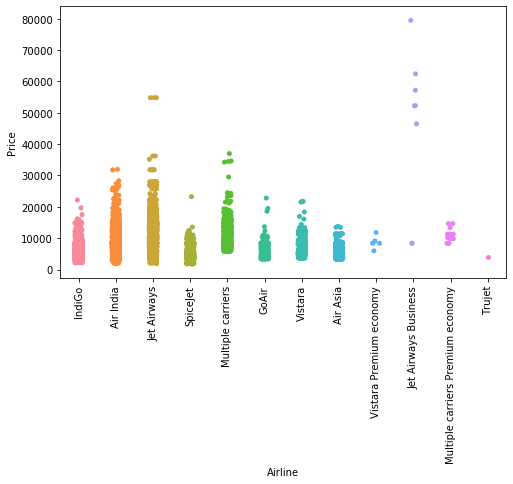

In [35]:
# Display the Price range for different Airlines using stripplot
plt.figure(figsize=(8,5))
sns.stripplot(x='Airline',y='Price',data=big_df)
plt.xticks(rotation = 90)
plt.show()

#### Inference :
The average price of jet airways business class is more than the maximum of any other airline.

### Sources and Desitinations

In [36]:
print('Source : ',big_df['Source'].unique())
print('Destinations : ',big_df['Destination'].unique())

Source :  ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destinations :  ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


### Finding busiest locations

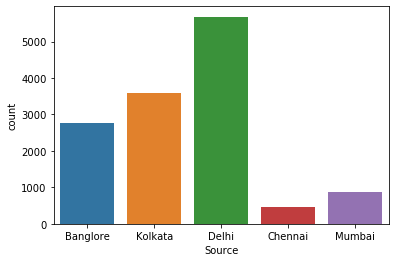

In [37]:
# Display a countplot to analyze the number of flights taking off from a particular source.
sns.countplot(x='Source',data=big_df)

#### Inference
Maximum number of flights take off from Delhi, followed by Kolkata and Banglore.

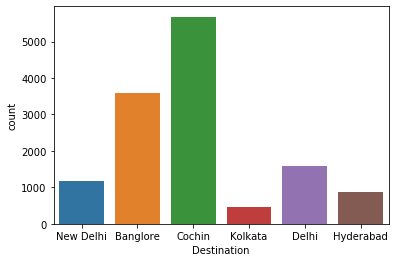

In [38]:
# Display a countplot to analyze the number of flights landing to a particular destination.
sns.countplot(x='Destination',data=big_df)

#### Inference
We do not have any data for taking off from Cochin, yet maximum number of flights land in Cochin. Followed by Bangalore.

### Understanding the variation in flight Price

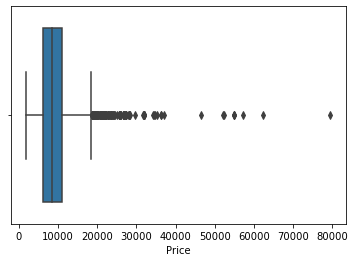

In [39]:
# Analyze variation in flight Price using a boxplot.
ax = sns.boxplot(x="Price",data=big_df)

#### Inference:
There are several values as outliers for flight Price. Still, we do not remove them as they represent the price for business class flights (although few but, cannot be neglected completely).

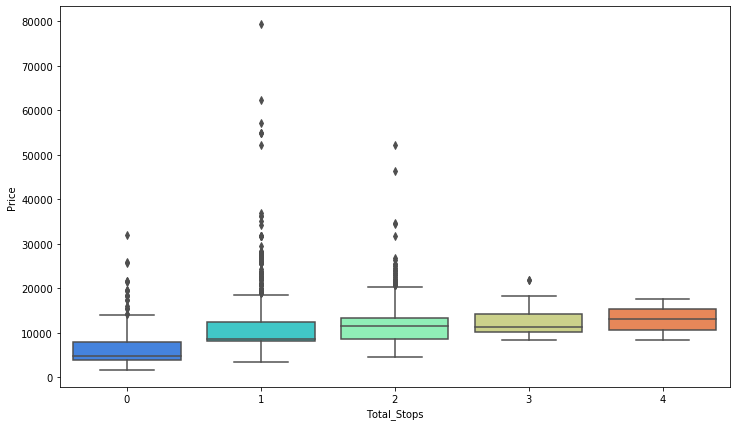

In [40]:
# Analyze variation in flight Price with respect to number of Stops using a boxplot.
plt.figure(figsize=(12,7))
sns.boxplot(x='Total_Stops',y='Price',data=big_df,palette='rainbow')

#### Inference:
It is observed that the Price for a flight increases as the number of stops increase.

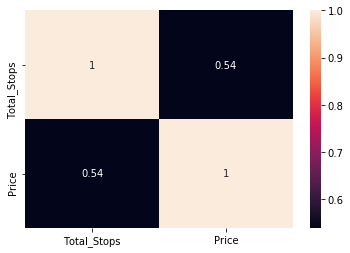

In [41]:
# Analyze the correlation between flight Price and number of Stops using a correlation matrix.
df=big_df[["Total_Stops","Price"]]

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Inference:
There exists a negative correlation between the Price of flight and the total number of stops it takes, i.e., as the total number of stops for a flight increases, it's price also increases.

### Scatter plot

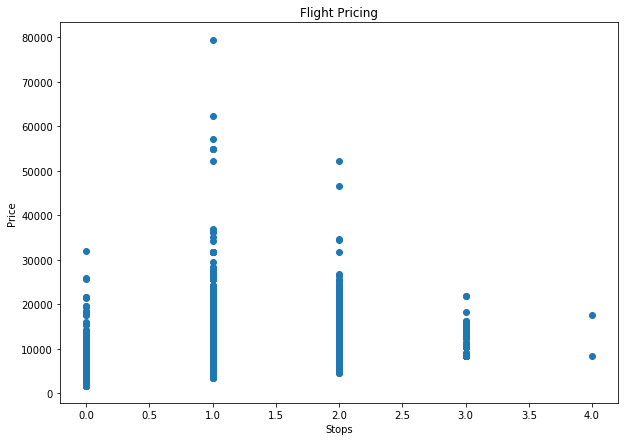

In [42]:
# Analyze the flight Price with respect to number of Stops using scatterplot.
plt.figure(figsize=(10, 7))
plt.scatter(big_df['Total_Stops'], big_df['Price'])
plt.title('Flight Pricing')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()

### Month wise count of flights

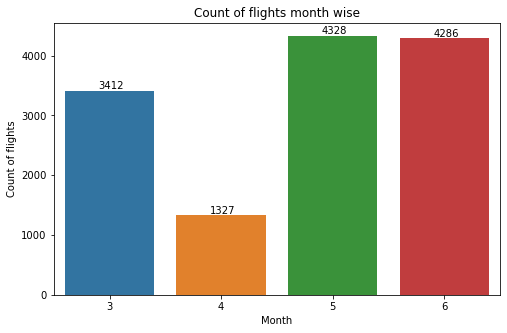

In [43]:
# Analyze the number of flights with respect to month using countplot.
plt.figure(figsize = (8, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = big_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+1), va='bottom', color= 'black')

#### Inference:
Maximum number of flights are recorded for the month of May, followed by June.

## LABEL ENCODING

In [44]:
# Encoding the categorical data to perform Feature Selection and Regression
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
big_df['Airline'] = encoder.fit_transform(big_df['Airline'])
big_df['Source'] = encoder.fit_transform(big_df['Source'])
big_df['Destination'] = encoder.fit_transform(big_df['Destination'])
big_df['Additional_Info'] = encoder.fit_transform(big_df['Additional_Info'])
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,hrs,mins,Dur_in_mins
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50,170
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25,445
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0,1140
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25,325
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45,285


## CLUSTERING ANALYSIS

In [45]:
# Import the requied libraries
from sklearn.cluster import KMeans
#import itertools
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score 
#from sklearn.datasets.samples_generator import make_blobs 

### Analysis 1: Price vs Duration

In [46]:
dp=big_df[["Dur_in_mins","Price"]]

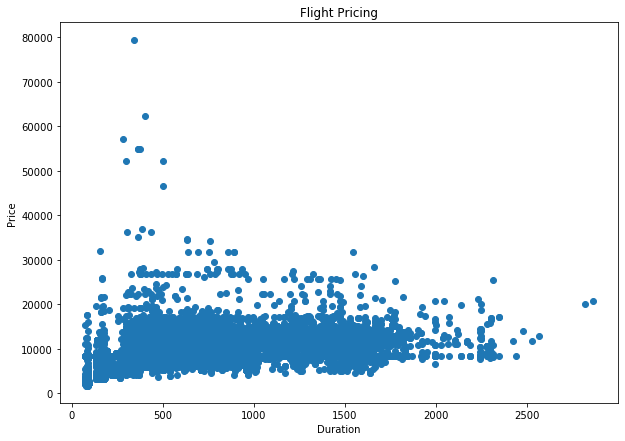

In [47]:
# scatter plot of the flight duration against the price
plt.figure(figsize=(10, 7))
plt.scatter(dp['Dur_in_mins'], dp['Price'])
plt.title('Flight Pricing')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

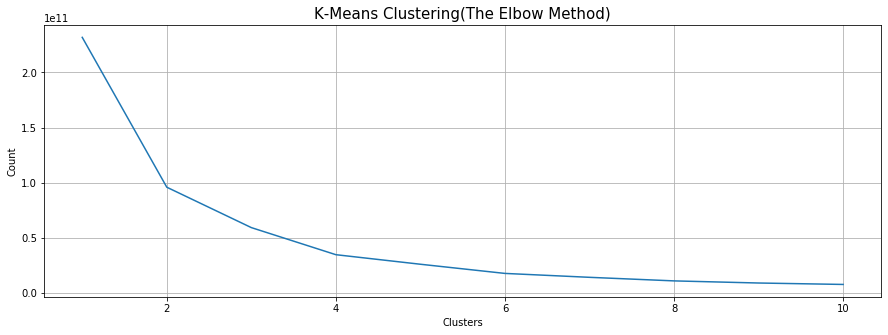

In [48]:
# Checking optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
    kmeans.fit(dp)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 15)
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.grid()
plt.show()

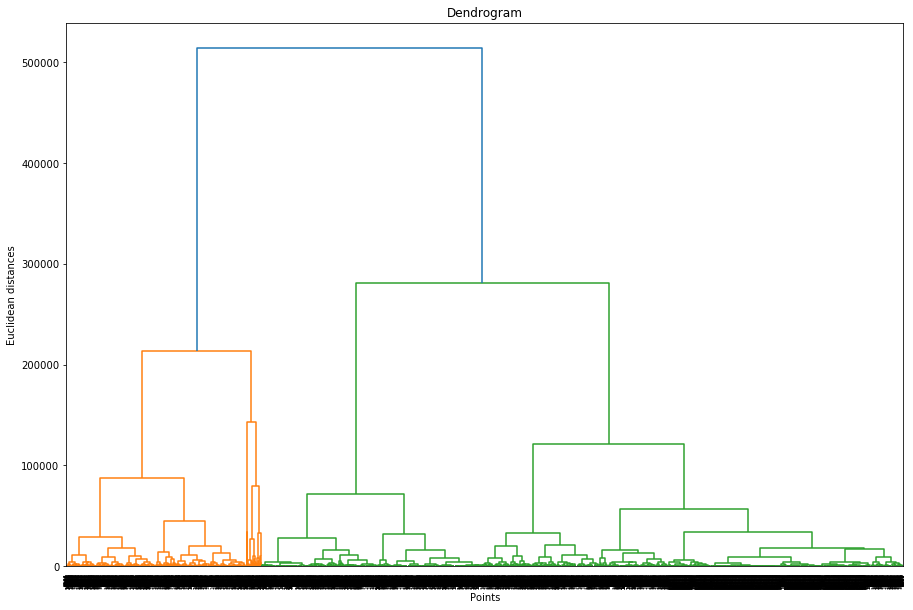

In [49]:
# Perform Hierarchical clustering and display dendrogram
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(dp, method  = "ward"))
plt.axis(rotate=90)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean distances')
plt.show()

#### Inference:
Optimal number of clusters = 6

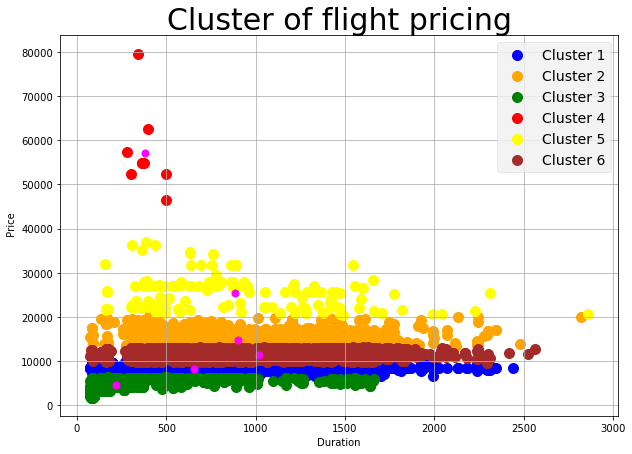

In [50]:
# Applying K-Means clustering
dp=np.array(dp)

kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(dp)

plt.figure(figsize = (10, 7))
plt.title('Cluster of flight pricing', fontsize = 30)

plt.scatter(dp[ymeans == 0, 0], dp[ymeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1' )
plt.scatter(dp[ymeans == 1, 0], dp[ymeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(dp[ymeans == 2, 0], dp[ymeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dp[ymeans == 3, 0], dp[ymeans == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(dp[ymeans == 4, 0], dp[ymeans == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(dp[ymeans == 5, 0], dp[ymeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'magenta')

plt.style.use('fivethirtyeight')
plt.xlabel('Duration')
plt.ylabel(' Price')
plt.legend()
plt.grid()
plt.show()

### Analysis 2: Price vs Number of stops

In [51]:
tsp=big_df[["Total_Stops","Price"]]

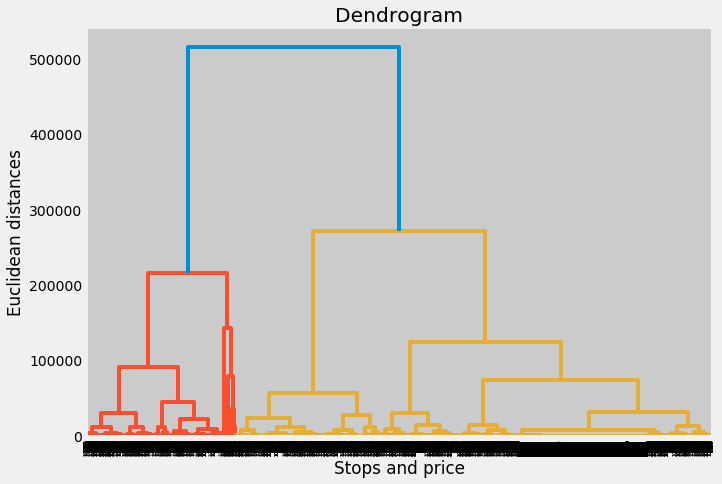

In [52]:
# Perform Hierarchical clustering and display dendrogram
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(tsp, method  = "ward"))
plt.axis(rotate=90)
plt.title('Dendrogram')
plt.xlabel('Stops and price')
plt.ylabel('Euclidean distances')
plt.show()

In [53]:
# Measuring the DB index values
db1=[]
kmax = 10
for k in range(2,kmax):
    kms = KMeans(n_clusters = k).fit(tsp)
    labels = kms.labels_
    db1.append((k, davies_bouldin_score(tsp, labels)))

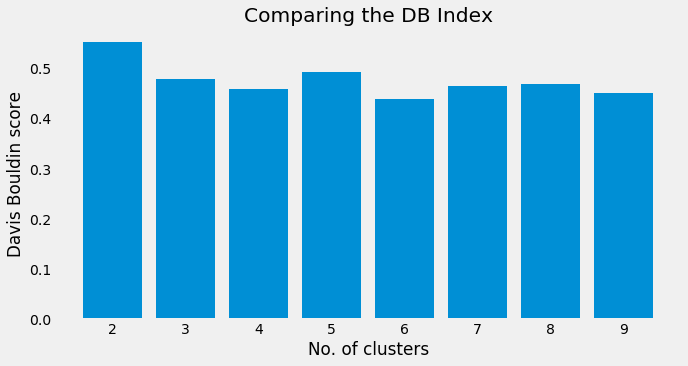

In [54]:
dbi1 = pd.DataFrame(db1)

# Plotting bar chart for clustering analysis
plt.figure(figsize=(10,5))

plt.bar(dbi1[0], dbi1[1])
plt.title('Comparing the DB Index')
plt.xlabel('No. of clusters')
plt.ylabel('Davis Bouldin score')
plt.grid()
plt.show()

#### Inference: 
Optimal No. of Clusters = 6

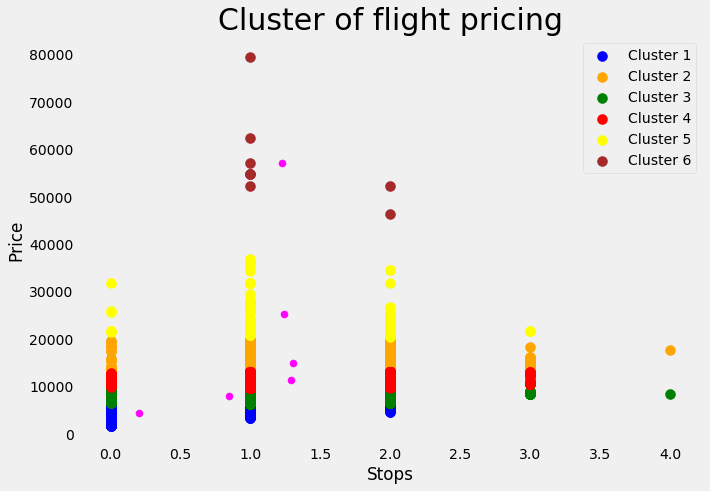

In [55]:
# Applying K-Means clustering
tsp=np.array(tsp)

kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(tsp)

plt.figure(figsize = (10, 7))
plt.title('Cluster of flight pricing', fontsize = 30)

plt.scatter(tsp[ymeans == 0, 0], tsp[ymeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1' )
plt.scatter(tsp[ymeans == 1, 0], tsp[ymeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(tsp[ymeans == 2, 0], tsp[ymeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(tsp[ymeans == 3, 0], tsp[ymeans == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(tsp[ymeans == 4, 0], tsp[ymeans == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(tsp[ymeans == 5, 0], tsp[ymeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'magenta')

plt.style.use('fivethirtyeight')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

### Analysis 3: Stops vs Duration

In [56]:
tsd=big_df[["Total_Stops","Dur_in_mins"]]

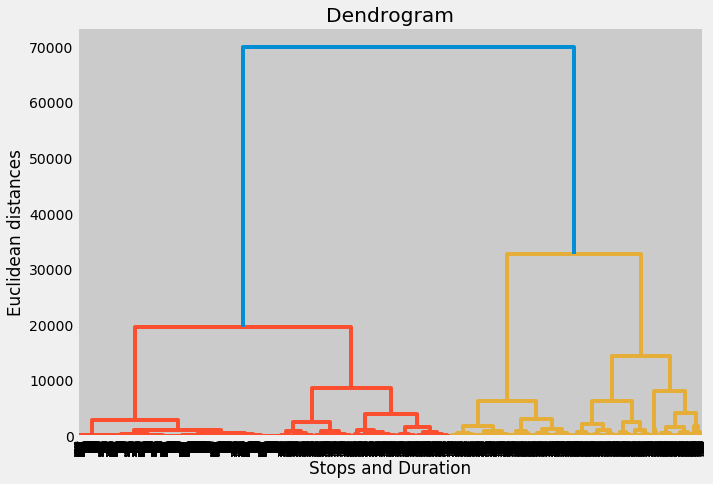

In [57]:
# Perform Hierarchical clustering and display dendrogram
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(tsd, method  = "ward"))
plt.axis(rotate=90)
plt.title('Dendrogram')
plt.xlabel('Stops and Duration')
plt.ylabel('Euclidean distances')
plt.show()

In [58]:
# Comparing the silhouette coefficient
ss2=[]
kmax = 10
for k in range(2,kmax):
    kms = KMeans(n_clusters = k).fit(tsd)
    labels = kms.labels_
    ss2.append((k, silhouette_score(tsd, labels, metric='euclidean')))
    
ss2=pd.DataFrame(ss2)

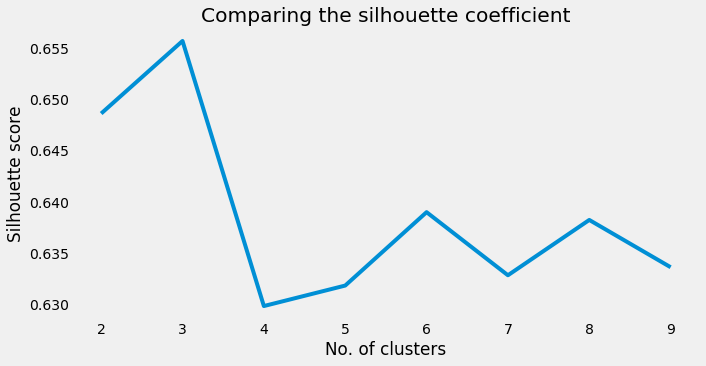

In [59]:
# Plotting line chart to find optimal value of k
plt.figure(figsize=(10,5))

plt.plot(ss2[0], ss2[1])
plt.title('Comparing the silhouette coefficient')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

#### Inference:
Optimal number of Clusters = 3

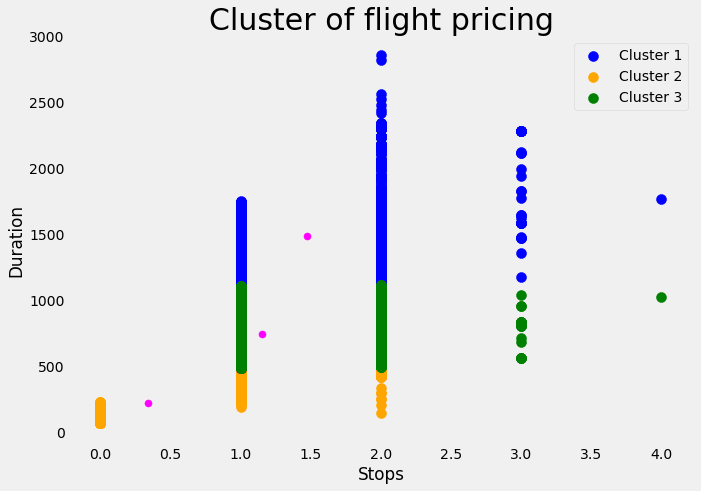

In [60]:
# Applying K-Means clustering
tsd=np.array(tsd)

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(tsd)

plt.figure(figsize = (10, 7))
plt.title('Cluster of flight pricing', fontsize = 30)

plt.scatter(tsd[ymeans == 0, 0], tsd[ymeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1' )
plt.scatter(tsd[ymeans == 1, 0], tsd[ymeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(tsd[ymeans == 2, 0], tsd[ymeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'magenta')

plt.style.use('fivethirtyeight')
plt.xlabel('Stops')
plt.ylabel('Duration')
plt.legend()
plt.grid()
plt.show()

### Why not 3d plot of all the columns?
Columns - Total Stops, Price, Duration

In [61]:
# Importing library for constructing 3D plot
from mpl_toolkits import mplot3d
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,hrs,mins,Dur_in_mins
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50,170
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25,445
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0,1140
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25,325
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45,285


In [62]:
# Selecting columns for applying clustering
spd = big_df.iloc[:,[3,5,15]].values
spd

array([[0.0000e+00, 3.8970e+03, 1.7000e+02],
       [2.0000e+00, 7.6620e+03, 4.4500e+02],
       [2.0000e+00, 1.3882e+04, 1.1400e+03],
       ...,
       [1.0000e+00, 8.3720e+03, 3.9500e+02],
       [1.0000e+00, 8.3720e+03, 9.1500e+02],
       [1.0000e+00, 8.3720e+03, 8.6000e+02]])

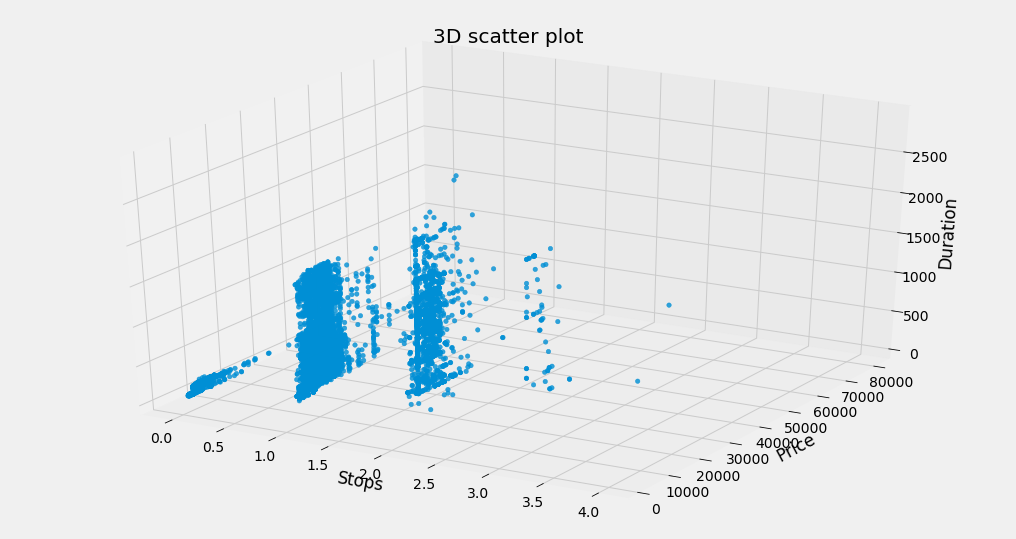

In [63]:
# Creating arrays for input 
x=np.array(spd[:,[0]])
y=np.array(spd[:,[1]])
z=np.array(spd[:,[2]])
# Creating figure 
fig = plt.figure(figsize = (16, 9)) 
ax = plt.axes(projection ="3d") 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2) 
# Creating plot 
sctt = ax.scatter3D(x, y, z, alpha = 0.8) 
plt.title("3D scatter plot") 
ax.set_xlabel('Stops') 
ax.set_ylabel('Price') 
ax.set_zlabel('Duration') 
# show plot 
plt.show() 

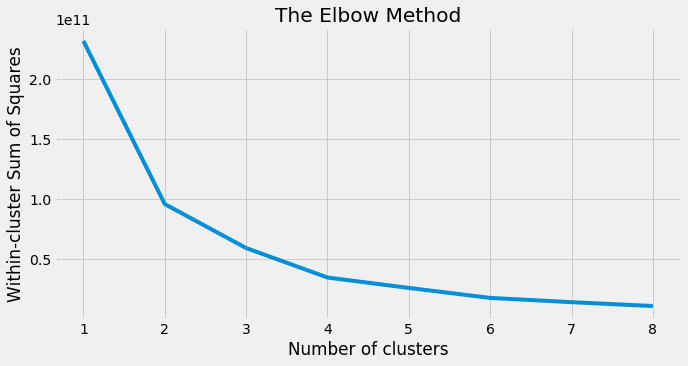

In [64]:
# Using the elbow method to find the optimal number of clusters
plt.figure(figsize=(10,5))
sswc = []
for i in range(1, 9):
    kmc = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15)
    kmc.fit(spd)
    sswc.append(kmc.inertia_)
plt.plot(range(1,9), sswc)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

In [65]:
# Comparing the silhouette coefficient
ss3=[]
kmax = 10
for k in range(2,kmax):
    kms = KMeans(n_clusters = k).fit(spd)
    labels = kms.labels_
    ss3.append((k, silhouette_score(spd, labels, metric='euclidean')))
ss3=pd.DataFrame(ss3)

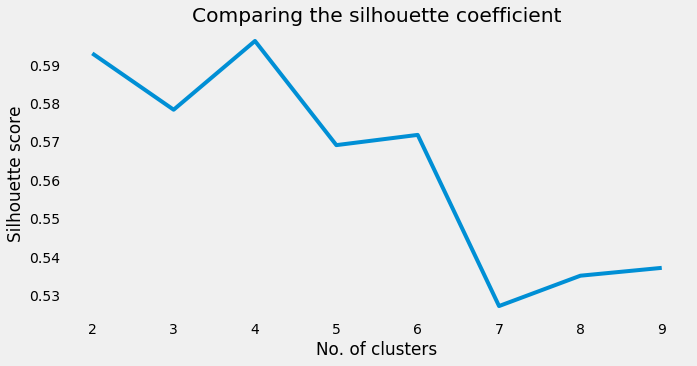

In [66]:
# Plotting line chart to find optimal value of k
plt.figure(figsize=(10,5))

plt.plot(ss3[0], ss3[1])
plt.title('Comparing the silhouette coefficient')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

#### Inference:
Optimal number of clusters = 4

In [67]:
# Fitting K-Means to the dataset
kmc = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmc = kmc.fit_predict(spd)

In [68]:
# Adding column cluster to  the dataset
big_df['cluster'] = y_kmc
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,hrs,mins,Dur_in_mins,cluster
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50,170,0
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25,445,2
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0,1140,1
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25,325,0
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45,285,1


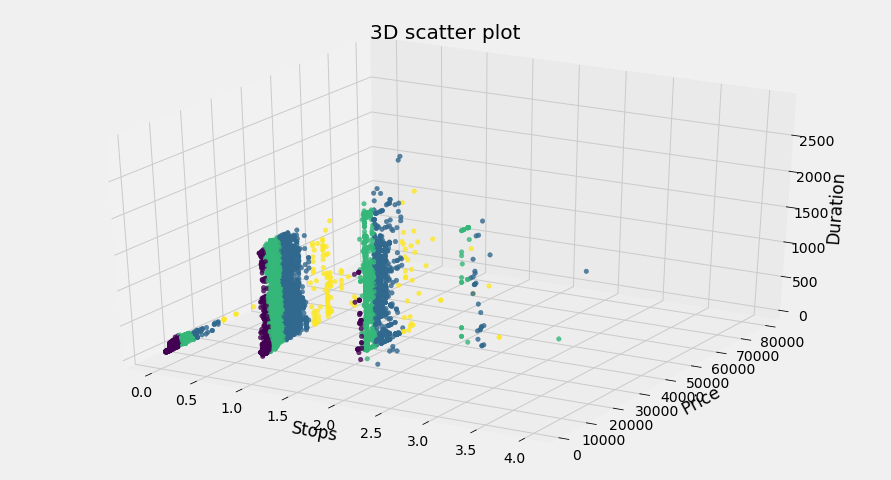

In [70]:
# Creating dataset 
x=np.array(spd[:,[0]])
y=np.array(spd[:,[1]])
z=np.array(spd[:,[2]])
# Creating figure 
fig = plt.figure(figsize = (14, 8)) 
ax = plt.axes(projection ="3d") 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2) 
# Creating plot 
sctt = ax.scatter3D(x, y, z, c=big_df["cluster"], alpha = 0.8) 
plt.title("3D scatter plot") 
ax.set_xlabel('Stops') 
ax.set_ylabel('Price') 
ax.set_zlabel('Duration') 
# show plot 
plt.show() 

# Feature Selection

In [71]:
# Import the required libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [72]:
# Split combined dataset into train and test
df_train = big_df[0:10683]
df_test = big_df[10683:]
# Remove the Price column from test dataset
X = df_train.drop(['Price'],axis=1)
y = df_train.Price
# Create feature selection model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [73]:
# Fit the feature selection model on train data
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [74]:
# Display the model support array to view which column is dropped (column with False value), if any
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True])

In [75]:
# Display list of selected features
selected_features = X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'hrs', 'mins', 'Dur_in_mins'],
      dtype='object')

In [76]:
# Since the year column is not an important feature, it is removed
X_train = X_train.drop(['Year'],axis=1)
X_test = X_test.drop(['Year'],axis=1)

# REGRESSION

In [77]:
# Import the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

# define a function to calculate Mean absolute error percentage
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Linear Regression

In [78]:
# Create and fit the regression model on train data.
le_reg = LinearRegression()
le_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Display value of y-intercept.
le_reg.intercept_

8681.331710561468

In [80]:
# Display value of feature coefficients.
le_reg.coef_

array([ 1.81562068e+02, -3.05897337e+02,  1.08914573e+02,  3.81981903e+03,
       -3.54292785e+00, -8.31621575e+01, -5.01234264e+02, -4.40599988e+00,
       -7.98502733e+00,  4.21015596e+01, -7.75364182e+00,  2.01585153e-01,
       -1.09803652e+01,  1.11474402e+00])

In [81]:
print('The coefficient of determination R^2 for train set is: {}'.format(le_reg.score(X_train,y_train)))
print('The coefficient of determination R^2 for test set is: {}'.format(le_reg.score(X_test,y_test)))

The coefficient of determination R^2 for train set is: 0.4331036225880013
The coefficient of determination R^2 for test set is: 0.444590400973508


In [82]:
# Display value of cross validation score.
score = cross_val_score(le_reg,X,y,cv=5)
score.mean()

0.4348324860037242

In [83]:
# Predict the outcome value of price for the test data.
y_pred = le_reg.predict(X_test)

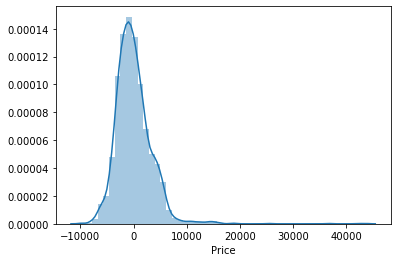

In [84]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-y_pred)

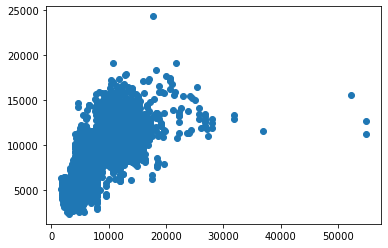

In [85]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,y_pred)

In [86]:
# Display the results for the regression model.
print("Test Results for Linear Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test,y_pred))

Test Results for Linear Regressor Model:
--------------------------------------------------
Root mean squared error:  3427.814523743249
Mean absolute error:  2441.8714664868644
Mean absolute % error:  31.0
R-squared:  0.444590400973508
Mean squared error:  11749912.409185156


## Ridge Regression

In [87]:
# Create and fit the regression model on train data.
ri_reg =Ridge()
parameters = {'alpha':[0.4,0.6,0.004,0.003,0.0004,0.07,3,0.005]}
ri_model = GridSearchCV(estimator=ri_reg,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')
ri_model.fit(X_train,y_train)
print(ri_model.best_params_)
print(ri_model.best_score_)

{'alpha': 0.6}
-12140316.266879352


In [88]:
# Display value of Mean squared error for train and test data
print('MSE for train set is: {}'.format(ri_model.score(X_train,y_train)))
print('MSE for train set is: {}'.format(ri_model.score(X_test,y_test)))

MSE for train set is: -12078973.820167415
MSE for train set is: -11749855.860753346


In [89]:
# Predict the outcome value of price for the test data.
rid_pred = ri_model.predict(X_test)

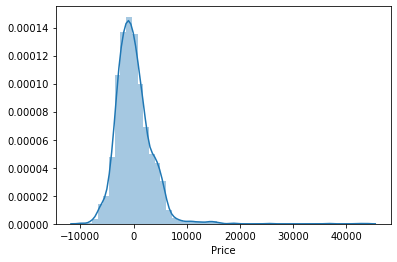

In [90]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-rid_pred)

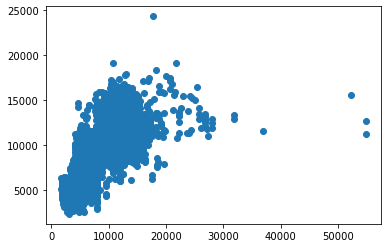

In [91]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,rid_pred)

In [92]:
# Display the results for the regression model.
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, rid_pred)))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,rid_pred))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, rid_pred)))
print("R-squared: ", r2_score(y_test, rid_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test,rid_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3427.8062752660553
Mean absolute error:  2441.8433475947777
Mean absolute % error:  31.0
R-squared:  0.4445930739757179
Mean squared error:  11749855.860753346


## Lasso Regression

In [93]:
# Create and fit the regression model on train data.
la_reg = Lasso()
para =  {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
las_model = RandomizedSearchCV(la_reg,para,cv=5,scoring='neg_mean_squared_error')
las_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [94]:
las_model.best_params_ , las_model.best_score_

({'alpha': 20}, -12137268.831863027)

In [95]:
# Predict the outcome value of price for the test data.
las_pred = las_model.predict(X_test)

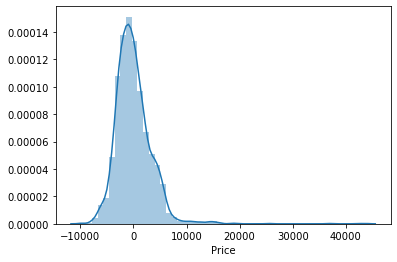

In [96]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-las_pred)

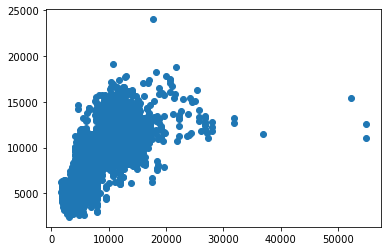

In [97]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,las_pred)

In [98]:
# Display the results for the regression model.
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, las_pred)))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,las_pred))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, las_pred)))
print("R-squared: ", r2_score(y_test, las_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test,las_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3427.704897904645
Mean absolute error:  2438.115466716091
Mean absolute % error:  31.0
R-squared:  0.44462592580661353
Mean squared error:  11749160.867119493


## Decision Tree Regressor

In [99]:
# Create and fit the regression model on train data.
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [100]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [101]:
# Display value of cross validation score.
tree.score(X_train,y_train),tree.score(X_test,y_test)
score = cross_val_score(tree,X_train,y_train,cv=5)
score.mean()

0.7404990829213187

In [102]:
# Predict the outcome value of price for the test data.
dt_pred = tree.predict(X_test)

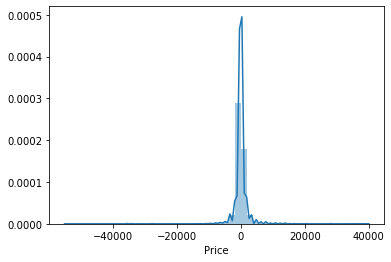

In [103]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-dt_pred)

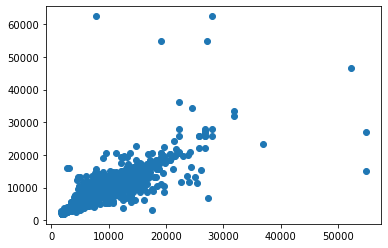

In [104]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,dt_pred)

In [105]:
# Display the results for the regression model.
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test,y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2368.4510849965563
Mean absolute error:  936.5044403578058
Mean absolute % error:  11.0
R-squared:  0.7348402555815323
Mean squared error:  5609560.542021365


### Hyperparameter optimization

In [106]:
# Setting values for parameter optimization
params = {"splitter"    : ["best","random"] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15], 
          "min_samples_leaf" : [ 1,2,3,4,5 ],
          "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
          "max_features" : ["auto","log2","sqrt",None ],
          "max_leaf_nodes":[None,10,20,30,40,50,60,70]}

dtree_reg = GridSearchCV(tree,params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3)

def time(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,tsec = div_mod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(tsec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [107]:
from datetime import datetime
start_time = None
dtree_reg.fit(X_train,y_train)
time(start_time)

Fitting 5 folds for each of 10240 candidates, totalling 51200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 31248 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 39952 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 51200 out of 51200 | elapsed:  1.6min finished


datetime.datetime(2020, 12, 27, 12, 11, 34, 99655)

In [108]:
dtree_reg.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [109]:
dtree_reg.best_score_

-9818797.164688276

In [110]:
# Predict the outcome value of price for the test data.
dtree_pred =dtree_reg.predict(X_test)
dtree_reg.score(X_train,y_train),dtree_reg.score(X_test,y_test)

(-9904047.611289809, -9755799.825659009)

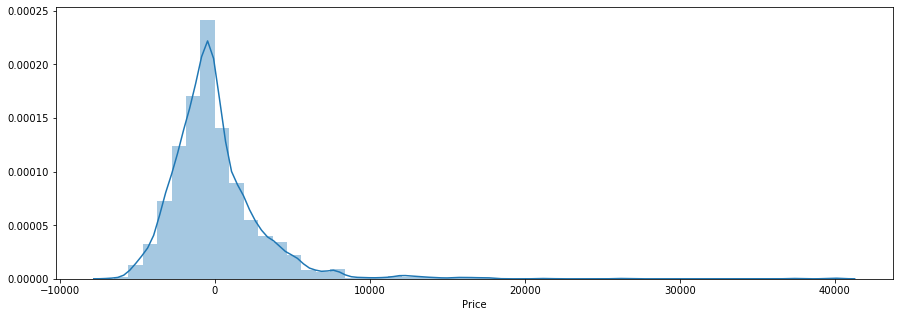

In [111]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-dtree_pred)

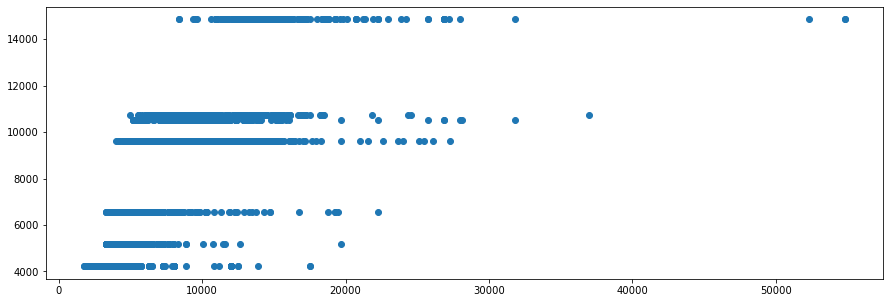

In [112]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,dtree_pred)

In [113]:
# Display the results for the optimized regression model.
print("Test Results for Decision Tree Regressor Model (after hyper-parameter optimization):")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, dtree_pred)))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,dtree_pred))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, dtree_pred)))
print("R-squared: ", r2_score(y_test, dtree_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test,dtree_pred))

Test Results for Decision Tree Regressor Model (after hyper-parameter optimization):
--------------------------------------------------
Root mean squared error: 2186.9460881928503
Mean absolute error: 826.6882244574637
Mean absolute % error: 9.0
R-squared: 0.7739237679158735
Mean squared error: 4782733.19266201


## Random Forest

In [114]:
# Create and fit the regression model on train data. 
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [115]:
rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)

(0.979016024069714, 0.8617942079394854)

In [116]:
# Predict the outcome value of price for the test data.
rf_pred = rf_reg.predict(X_test)

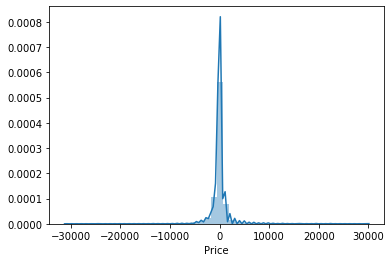

In [117]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-rf_pred)

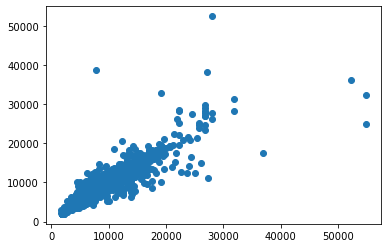

In [118]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,rf_pred)

In [119]:
# Display the results for the regression model.
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, rf_pred)))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,rf_pred))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, rf_pred)))
print("R-squared: ", r2_score(y_test, rf_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test,rf_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1709.9119444096762
Mean absolute error:  721.912983740683
Mean absolute % error:  8.0
R-squared:  0.8617942079394854
Mean squared error:  2923798.8576348796


### Hyperparameter optimization

In [120]:
# List of parameters for optimization
rf_reg.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [121]:
# Setting values for parameter optimization
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]
max_depth = [int(i) for i in np.linspace(5,30,num=6)]
min_weight_fraction_leaf =[0.1,0.2,0.4,0.5,0.7,0.6]
max_features = ['auto','sqrt']
min_samples_split = [4,5,7,10,15,100]
min_samples_leaf = [1,5,7,10]

ran_params = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'max_features' : max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [122]:
# Create and fit the optimized regression model on train data.
rand_reg = RandomizedSearchCV(rf_reg,param_distributions=ran_params,n_iter=100,cv=5,scoring='neg_mean_squared_error',verbose=3,n_jobs=-1)
rand_reg.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 17.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [123]:
rand_reg.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [124]:
rand_reg.best_score_

-2971737.948826609

In [125]:
# Predict the outcome value of price for the test data.
rand_pred = rand_reg.predict(X_test)

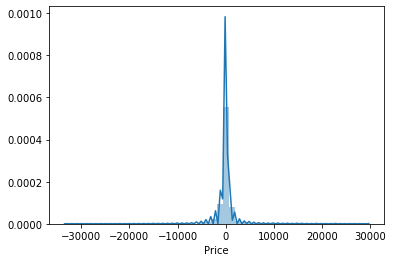

In [126]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-rand_pred)

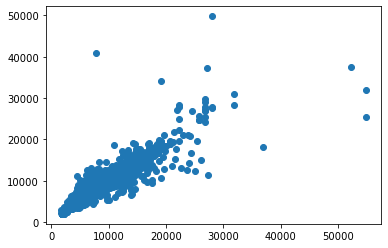

In [127]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,rand_pred)

In [128]:
# Display the results for the optimized regression model.
print("Test Results for Random Forest Regressor Model (after hyper-parameter optimization):")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, rand_pred)))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,rand_pred))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, rand_pred)))
print("R-squared: ", r2_score(y_test, rand_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test,rand_pred))

Test Results for Random Forest Regressor Model (after hyper-parameter optimization):
--------------------------------------------------
Root mean squared error:  1699.990138776834
Mean absolute error:  719.894145818965
Mean absolute % error:  8.0
R-squared:  0.8633934395864429
Mean squared error:  2889966.4719384797


# XGBOOST

In [129]:
# Create and fit the regression model on train data.
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [130]:
xg_reg.score(X_train,y_train),xg_reg.score(X_test,y_test)

(0.8369769891035701, 0.7673352900427461)

In [131]:
# Predict the outcome value of price for the test data.
xg_pred = xg_reg.predict(X_test)

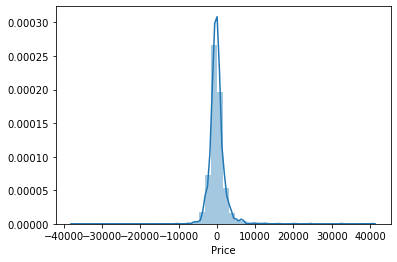

In [132]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-xg_pred)

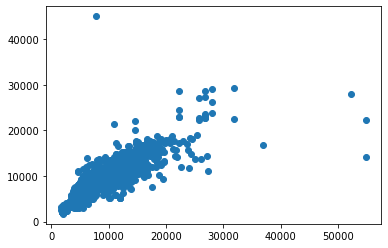

In [133]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,xg_pred)

In [134]:
# Display the results for the regression model.
print("Test Results for XGBoost Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, xg_pred)))
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,xg_pred))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, xg_pred)))
print("R-squared: ", r2_score(y_test, xg_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test,xg_pred))

Test Results for XGBoost Model:
--------------------------------------------------
Root mean squared error:  2218.5840258078942
Mean absolute error:  1297.783724123379
Mean absolute % error:  15.0
R-squared:  0.7673352900427461
Mean squared error:  4922115.079569963


### Hyperparameter optimization

In [135]:
# List of parameters for optimization
xg_reg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [136]:
# Setting values for parameter optimization
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]
learning_rate = [0.2,0.3,0.4,0.5,0.6]
max_depth = [int(i) for i in np.linspace(5,40,num=8)]
min_child_weight = [3,5,6,8,7]
subsample = [0.4,0.5,0.7,0.8,0.9]

ran_params = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'learning_rate' : learning_rate,
             'min_child_weight': min_child_weight,
             'subsample':subsample}

In [142]:
# Create and fit the optimized regression model on train data.
xg_r = RandomizedSearchCV(xg_reg,ran_params,n_iter=100,scoring='neg_mean_squared_error',cv=5,verbose=3)
xg_r.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5 
[01:18:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5, score=-3594671.817, total=  29.2s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5 
[01:18:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.1s remaining:    0.0s
C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5, score=-4758449.064, total=  28.5s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5 
[01:18:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.6s remaining:    0.0s
C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5, score=-3844972.400, total=  28.9s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5 
[01:19:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5, score=-3935267.117, total=  29.3s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5 
[01:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=5, max_depth=20, learning_rate=0.5, score=-3136136.753, total=  28.8s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2 
[01:20:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-2810178.118, total=  22.2s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2 
[01:20:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-3236653.106, total=  20.9s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2 
[01:21:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-2815928.162, total=  21.6s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2 
[01:21:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-2699852.591, total=  21.9s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2 
[01:21:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-1985678.392, total=  21.9s
[CV] subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4 
[01:22:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4, score=-3720748.535, total=   9.1s
[CV] subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4 
[01:22:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4, score=-3588480.976, total=  10.3s
[CV] subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4 
[01:22:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4, score=-3587898.252, total=  10.6s
[CV] subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4 
[01:22:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4, score=-3151843.193, total=  10.7s
[CV] subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4 
[01:22:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=8, max_depth=30, learning_rate=0.4, score=-2634727.574, total=  10.5s
[CV] subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5 
[01:23:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5, score=-3192226.544, total=   3.4s
[CV] subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5 
[01:23:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5, score=-3211272.675, total=   4.6s
[CV] subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5 
[01:23:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5, score=-2662626.949, total=   4.5s
[CV] subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5 
[01:23:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5, score=-2583340.204, total=   4.7s
[CV] subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5 
[01:23:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=8, max_depth=5, learning_rate=0.5, score=-2005596.574, total=   4.6s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6 
[01:23:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6, score=-4695436.288, total=  24.5s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6 
[01:23:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6, score=-5174663.425, total=  23.5s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6 
[01:24:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6, score=-5877516.546, total=  22.6s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6 
[01:24:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6, score=-4335555.827, total=  23.3s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6 
[01:25:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.6, score=-4083473.316, total=  25.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2 
[01:25:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-2769636.481, total=  12.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2 
[01:25:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-2879582.033, total=  13.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2 
[01:25:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-2802538.314, total=  12.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2 
[01:26:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-2589775.020, total=  12.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2 
[01:26:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-1868532.696, total=  12.5s
[CV] subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6 
[01:26:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6, score=-4052628.463, total=   7.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6 
[01:26:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6, score=-3421375.728, total=   6.9s
[CV] subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6 
[01:26:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6, score=-3484639.967, total=   6.9s
[CV] subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6 
[01:26:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6, score=-3067395.181, total=   7.7s
[CV] subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6 
[01:27:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.6, score=-2186223.558, total=   7.3s
[CV] subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5 
[01:27:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5, score=-4654790.542, total=  17.3s
[CV] subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5 
[01:27:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5, score=-5168836.705, total=  17.2s
[CV] subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5 
[01:27:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5, score=-4526441.652, total=  17.2s
[CV] subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5 
[01:27:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5, score=-3977641.837, total=  17.5s
[CV] subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5 
[01:28:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.5, score=-3449981.251, total=  17.2s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2 
[01:28:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2, score=-2632799.853, total=  39.8s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2 
[01:29:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2, score=-3160501.600, total=  39.3s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2 
[01:29:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2, score=-3549226.265, total=  40.5s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2 
[01:30:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2, score=-2546762.463, total=  42.5s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2 
[01:31:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=3, max_depth=25, learning_rate=0.2, score=-1894209.013, total=  38.7s
[CV] subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3 
[01:31:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-3083371.736, total=   3.0s
[CV] subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3 
[01:31:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-3287333.337, total=   4.2s
[CV] subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3 
[01:32:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-2775807.317, total=   4.1s
[CV] subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3 
[01:32:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-2744031.477, total=   3.1s
[CV] subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3 
[01:32:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-2219698.876, total=   4.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5 
[01:32:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5, score=-3161074.233, total=  20.9s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5 
[01:32:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5, score=-3428170.066, total=  23.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5 
[01:32:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5, score=-3933870.000, total=  24.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5 
[01:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5, score=-2947326.916, total=  20.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5 
[01:33:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=35, learning_rate=0.5, score=-2224101.515, total=  19.6s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[01:34:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6, score=-3249192.715, total=  36.9s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[01:34:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6, score=-3488258.354, total=  37.0s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[01:35:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6, score=-3356668.334, total=  36.4s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[01:35:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6, score=-3302151.157, total=  35.7s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[01:36:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.6, score=-2305595.763, total=  34.5s
[CV] subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:37:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2633772.369, total=   8.3s
[CV] subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:37:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2834933.474, total=   9.6s
[CV] subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:37:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2831367.845, total=   8.6s
[CV] subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2565286.505, total=   9.5s
[CV] subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:37:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2067092.398, total=   9.7s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2 
[01:37:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2, score=-2819161.237, total=   7.1s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2 
[01:37:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2, score=-3107920.209, total=   7.1s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2 
[01:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2, score=-2826360.353, total=   8.4s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2 
[01:38:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2, score=-2525039.534, total=   7.1s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2 
[01:38:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.2, score=-2118564.615, total=   7.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[01:38:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-3220610.012, total=   3.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[01:38:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-3511916.528, total=   2.0s
[CV] subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[01:38:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-3402506.450, total=   2.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[01:38:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-3044020.133, total=   2.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[01:38:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-2097383.558, total=   3.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4 
[01:38:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-3260001.773, total=   4.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4 
[01:38:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-3434115.903, total=   4.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4 
[01:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-3181085.768, total=   5.4s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4 
[01:38:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-2599653.088, total=   4.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4 
[01:38:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-2131850.417, total=   4.7s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3 
[01:39:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3, score=-2884734.962, total=   4.5s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3 
[01:39:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3, score=-3197555.122, total=   4.3s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3 
[01:39:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3, score=-3483659.007, total=   4.3s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3 
[01:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3, score=-2791103.264, total=   4.3s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3 
[01:39:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.3, score=-2410092.161, total=   4.3s
[CV] subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4 
[01:39:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4, score=-3239747.540, total=   7.5s
[CV] subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4 
[01:39:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4, score=-3829797.915, total=   8.6s
[CV] subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4 
[01:39:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4, score=-3920091.589, total=   8.7s
[CV] subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4 
[01:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4, score=-3249445.293, total=   8.2s
[CV] subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4 
[01:39:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.4, score=-2692381.691, total=   8.1s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2 
[01:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2, score=-2680513.767, total=  10.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2 
[01:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2, score=-2867375.532, total=  11.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2 
[01:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2, score=-2743026.281, total=  11.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2 
[01:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2, score=-2594610.399, total=  10.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2 
[01:40:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.2, score=-1843710.503, total=  10.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4 
[01:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-3113814.410, total=   5.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4 
[01:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-3257826.690, total=   5.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4 
[01:41:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-4181873.439, total=   5.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4 
[01:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-2898462.883, total=   5.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4 
[01:41:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-2017802.105, total=   5.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2 
[01:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2784419.941, total=  34.8s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2 
[01:42:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2984988.437, total=  41.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2 
[01:42:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2824022.711, total=  38.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2 
[01:43:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2549590.753, total=  36.4s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2 
[01:43:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-1909318.845, total=  34.1s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6 
[01:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6, score=-5313935.550, total=  28.9s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6 
[01:45:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6, score=-4987535.490, total=  28.5s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6 
[01:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6, score=-4936337.099, total=  28.1s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6 
[01:45:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6, score=-4092090.444, total=  26.6s
[CV] subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6 
[01:46:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_weight=6, max_depth=30, learning_rate=0.6, score=-3780423.324, total=  25.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3 
[01:46:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3, score=-2909199.799, total=  22.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3 
[01:47:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3, score=-3121941.299, total=  31.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3 
[01:47:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3, score=-2877227.014, total=  38.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3 
[01:48:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3, score=-2498921.715, total=  37.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3 
[01:49:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=15, learning_rate=0.3, score=-1992740.139, total=  37.9s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:49:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2675753.933, total=  22.9s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:50:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2915028.067, total=  23.6s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:50:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2839031.748, total=  23.1s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:50:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2608100.766, total=  23.8s
[CV] subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2 
[01:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=8, max_depth=30, learning_rate=0.2, score=-2099071.109, total=  23.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5 
[01:51:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3351189.464, total=  36.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5 
[01:52:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3764063.986, total=  37.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5 
[01:52:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3584291.400, total=  36.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5 
[01:53:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3102671.694, total=  37.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5 
[01:54:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-2377591.364, total=  36.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[01:54:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-4554275.590, total=  26.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[01:55:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-4067746.844, total=  27.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[01:55:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-4595582.340, total=  28.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[01:56:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-3612222.021, total=  26.7s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[01:56:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-2819818.289, total=  28.0s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6 
[01:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-5844115.335, total=  20.2s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6 
[01:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-5493971.065, total=  20.5s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6 
[01:57:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-4803261.319, total=  20.1s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6 
[01:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-5001079.955, total=  21.0s
[CV] subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6 
[01:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=8, max_depth=35, learning_rate=0.6, score=-4571077.406, total=  19.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5 
[01:58:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5, score=-3721717.369, total=  11.9s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5 
[01:58:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5, score=-4335790.928, total=  12.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5 
[01:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5, score=-3518467.350, total=  13.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5 
[01:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5, score=-3287164.652, total=  12.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5 
[01:59:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.5, score=-2541985.710, total=  12.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[01:59:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-3431547.867, total=  11.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[01:59:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-3289310.903, total=  11.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[02:00:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-3918077.143, total=  12.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[02:00:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-3209803.428, total=  11.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[02:00:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-2251887.327, total=  12.0s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3 
[02:00:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3, score=-2651323.054, total=  20.1s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3 
[02:00:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3, score=-3068009.306, total=  20.5s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3 
[02:01:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3, score=-3012119.349, total=  19.7s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3 
[02:01:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3, score=-2615347.322, total=  20.0s
[CV] subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3 
[02:01:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=7, max_depth=35, learning_rate=0.3, score=-1901340.809, total=  19.6s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2 
[02:02:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-2796464.979, total=  43.6s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2 
[02:03:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-3244282.823, total=  43.1s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2 
[02:03:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-2809642.110, total=  42.9s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2 
[02:04:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-2739954.618, total=  43.4s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2 
[02:05:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.2, score=-2002859.881, total=  44.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3 
[02:05:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-3116491.393, total=   9.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3 
[02:06:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-3031993.661, total=   9.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3 
[02:06:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-2690942.246, total=   9.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3 
[02:06:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-2481368.792, total=   9.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3 
[02:06:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-1909383.582, total=   9.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2 
[02:06:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-2718416.185, total=   5.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2 
[02:06:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-3071297.107, total=   5.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2 
[02:06:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-2591332.640, total=   5.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2 
[02:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-2355538.094, total=   5.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2 
[02:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-1829083.890, total=   4.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:07:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2770585.194, total=  43.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:07:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2948208.657, total=  42.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:08:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2810829.337, total=  42.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:09:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2557508.743, total=  41.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:09:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-1883055.703, total=  41.9s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6 
[02:10:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6, score=-3026606.653, total=   8.4s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6 
[02:10:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6, score=-3407706.751, total=   8.0s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6 
[02:10:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6, score=-2895066.430, total=   8.1s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6 
[02:11:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6, score=-2640900.949, total=   8.5s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6 
[02:11:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.6, score=-2243769.940, total=   8.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6 
[02:11:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6, score=-3807491.592, total=  43.2s
[CV] subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6 
[02:12:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6, score=-3708588.582, total=  42.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6 
[02:12:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6, score=-3852026.963, total=  40.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6 
[02:13:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6, score=-3159561.088, total=  40.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6 
[02:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.6, score=-2545472.517, total=  43.0s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2 
[02:14:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2, score=-2994057.857, total= 1.2min
[CV] subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2 
[02:16:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2, score=-3191388.541, total= 1.2min
[CV] subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2 
[02:17:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2, score=-3316798.798, total= 1.1min
[CV] subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2 
[02:18:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2, score=-2765464.529, total= 1.2min
[CV] subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2 
[02:19:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.2, score=-2072918.876, total= 1.1min
[CV] subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4 
[02:20:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4, score=-2940226.045, total=   7.5s
[CV] subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4 
[02:20:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4, score=-3003308.847, total=   7.2s
[CV] subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4 
[02:20:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4, score=-2514070.677, total=   7.3s
[CV] subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4 
[02:20:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4, score=-2767959.304, total=   7.6s
[CV] subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4 
[02:21:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.4, score=-1865991.072, total=   7.1s
[CV] subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3 
[02:21:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3, score=-2880484.365, total=   3.9s
[CV] subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3 
[02:21:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3, score=-3263905.890, total=   4.1s
[CV] subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3 
[02:21:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3, score=-3009672.920, total=   3.7s
[CV] subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3 
[02:21:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3, score=-2599982.757, total=   3.8s
[CV] subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3 
[02:21:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=6, max_depth=35, learning_rate=0.3, score=-2264963.690, total=   4.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:21:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-3134931.080, total=  13.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:21:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-3471391.577, total=  13.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:21:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-3377950.168, total=  13.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:22:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-2712594.987, total=  13.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:22:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-2092773.102, total=  13.2s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[02:22:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, score=-3104646.213, total=  21.7s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[02:23:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, score=-3601089.253, total=  22.8s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[02:23:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, score=-3291268.413, total=  22.0s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[02:23:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, score=-3169699.927, total=  21.7s
[CV] subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[02:24:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, score=-2254574.242, total=  22.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6 
[02:24:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6, score=-3514975.392, total=  51.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6 
[02:25:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6, score=-4050185.647, total=  50.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6 
[02:26:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6, score=-3747236.014, total=  51.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6 
[02:27:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6, score=-3443081.341, total=  53.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6 
[02:27:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.6, score=-2765843.784, total=  49.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:28:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-2812486.018, total=  13.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:29:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-3284310.142, total=  14.6s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:29:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-3064239.140, total=  13.6s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:29:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-2629041.002, total=  13.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4 
[02:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.4, score=-1926897.280, total=  13.6s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3 
[02:29:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-2944364.177, total=  11.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3 
[02:30:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-2963268.494, total=  11.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3 
[02:30:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-2714076.485, total=  11.6s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3 
[02:30:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-2457525.376, total=  11.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3 
[02:30:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1940934.762, total=  11.0s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[02:30:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-4085464.139, total=  45.1s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[02:31:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-4317300.191, total=  44.3s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[02:32:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-4039286.033, total=  43.6s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[02:33:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-3359896.302, total=  45.0s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5 
[02:33:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=40, learning_rate=0.5, score=-3121542.769, total=  45.9s
[CV] subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3 
[02:34:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-3527177.409, total=  14.3s
[CV] subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3 
[02:34:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-3314685.751, total=  14.7s
[CV] subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3 
[02:35:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-3286901.511, total=  15.0s
[CV] subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3 
[02:35:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-3221189.771, total=  14.0s
[CV] subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3 
[02:35:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=400, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-2497096.199, total=  13.5s
[CV] subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3 
[02:35:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3, score=-2639567.125, total=   9.3s
[CV] subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3 
[02:35:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3, score=-2900968.835, total=   9.4s
[CV] subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3 
[02:36:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3, score=-2879951.237, total=   9.2s
[CV] subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3 
[02:36:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3, score=-2448641.697, total=   9.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3 
[02:36:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=200, min_child_weight=8, max_depth=30, learning_rate=0.3, score=-1865216.519, total=   9.3s
[CV] subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3 
[02:36:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-3002126.054, total=  18.1s
[CV] subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3 
[02:36:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-3138841.968, total=  18.0s
[CV] subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3 
[02:37:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-3219387.856, total=  18.3s
[CV] subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3 
[02:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-2780776.058, total=  18.1s
[CV] subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3 
[02:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.3, score=-2505976.415, total=  18.4s
[CV] subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5 
[02:38:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5, score=-4390217.821, total=  20.1s
[CV] subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5 
[02:38:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5, score=-5292662.548, total=  21.4s
[CV] subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5 
[02:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5, score=-4107051.291, total=  20.6s
[CV] subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5 
[02:39:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5, score=-3982591.586, total=  20.5s
[CV] subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5 
[02:39:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=5, max_depth=25, learning_rate=0.5, score=-3542752.394, total=  20.5s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:39:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-4072680.857, total=  48.6s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:40:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-4343311.036, total=  49.0s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-4024876.947, total=  48.5s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:42:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3415004.112, total=  49.5s
[CV] subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:43:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3169852.308, total=  48.1s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5 
[02:43:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5, score=-3922414.077, total=  22.9s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5 
[02:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5, score=-4103008.329, total=  22.1s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5 
[02:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5, score=-3946576.041, total=  22.5s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5 
[02:45:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5, score=-3669184.950, total=  22.7s
[CV] subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5 
[02:45:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=3, max_depth=40, learning_rate=0.5, score=-2880733.861, total=  22.3s
[CV] subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:45:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3892392.326, total=   3.4s
[CV] subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:45:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3904588.781, total=   3.4s
[CV] subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:45:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3903172.814, total=   3.3s
[CV] subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:45:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3271778.017, total=   3.3s
[CV] subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:45:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3240864.404, total=   3.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5 
[02:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5, score=-3302566.022, total=  22.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5 
[02:46:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5, score=-3579799.574, total=  24.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5 
[02:46:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5, score=-2985945.959, total=  23.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5 
[02:47:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5, score=-2871030.406, total=  22.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5 
[02:47:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=10, learning_rate=0.5, score=-2306438.355, total=  22.4s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4 
[02:47:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-3254975.816, total=   4.4s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4 
[02:48:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-3468349.769, total=   4.3s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4 
[02:48:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-3107894.667, total=   4.4s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4 
[02:48:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-3095560.486, total=   4.4s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4 
[02:48:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-2791912.252, total=   4.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-2901474.542, total=  15.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:48:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3374670.035, total=  14.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-3442509.582, total=  15.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:49:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-2732708.493, total=  14.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5 
[02:49:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=300, min_child_weight=8, max_depth=35, learning_rate=0.5, score=-2282989.173, total=  14.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:49:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2621687.257, total=  13.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:49:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-3076180.388, total=  13.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:50:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2947275.544, total=  13.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:50:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-2694008.481, total=  13.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2 
[02:50:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, score=-1854448.222, total=  13.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[02:50:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-3151794.411, total=   2.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[02:50:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-2955816.344, total=   2.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[02:50:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-3253067.422, total=   2.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[02:50:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-2427476.897, total=   2.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[02:50:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-1938012.628, total=   2.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[02:50:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, score=-3074662.663, total=   1.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[02:50:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, score=-3135981.712, total=   1.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[02:50:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, score=-3559468.195, total=   1.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[02:50:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, score=-2310226.471, total=   1.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[02:51:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, score=-1833509.241, total=   1.8s
[CV] subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4 
[02:51:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4, score=-2676516.546, total=  41.9s
[CV] subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4 
[02:51:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4, score=-3281634.281, total=  39.7s
[CV] subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4 
[02:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4, score=-3624076.565, total=  39.5s
[CV] subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4 
[02:53:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4, score=-2761506.546, total=  39.6s
[CV] subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4 
[02:53:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=600, min_child_weight=3, max_depth=30, learning_rate=0.4, score=-2197915.479, total=  39.7s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5 
[02:54:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-4129195.852, total=  45.1s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5 
[02:55:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-4200823.976, total=  45.1s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5 
[02:55:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-4007764.009, total=  44.6s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5 
[02:56:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-3336945.457, total=  46.5s
[CV] subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5 
[02:57:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-3144203.099, total=  44.2s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6 
[02:58:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6, score=-3601989.650, total=   5.3s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6 
[02:58:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6, score=-3383923.746, total=   5.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6 
[02:58:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6, score=-3260995.218, total=   5.4s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6 
[02:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6, score=-2810383.860, total=   5.5s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6 
[02:58:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=5, learning_rate=0.6, score=-2066032.971, total=   5.8s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5 
[02:58:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5, score=-3657576.544, total=  34.8s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5 
[02:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5, score=-3369518.420, total=  34.0s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5 
[02:59:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5, score=-3635735.613, total=  33.9s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5 
[03:00:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5, score=-3010149.171, total=  34.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5 
[03:00:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=5, max_depth=40, learning_rate=0.5, score=-2091642.737, total=  34.1s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6 
[03:01:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6, score=-3310064.967, total=   8.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6 
[03:01:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6, score=-3748406.120, total=   8.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6 
[03:01:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6, score=-3455600.807, total=   8.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6 
[03:01:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6, score=-2885779.927, total=   8.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6 
[03:02:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.6, score=-2280029.562, total=   8.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4 
[03:02:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-3455621.590, total=  25.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4 
[03:02:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-3279343.486, total=  25.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4 
[03:03:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-4046075.580, total=  25.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4 
[03:03:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-3159872.852, total=  25.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4 
[03:03:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=20, learning_rate=0.4, score=-2266001.909, total=  25.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[03:04:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-2930075.291, total=   3.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[03:04:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-3165352.948, total=   3.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[03:04:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-3553517.007, total=   3.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[03:04:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-2831534.564, total=   2.9s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4 
[03:04:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.4, score=-2206022.747, total=   3.0s
[CV] subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[03:04:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-4055257.572, total=   4.7s
[CV] subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[03:04:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-4797359.286, total=   4.6s
[CV] subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[03:04:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-4245498.487, total=   4.4s
[CV] subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[03:04:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-3894841.747, total=   4.4s
[CV] subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5 
[03:04:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.5, score=-3319627.220, total=   4.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6 
[03:04:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6, score=-3251377.126, total=  53.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6 
[03:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6, score=-3835716.074, total=  53.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6 
[03:06:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6, score=-3620034.665, total=  54.9s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6 
[03:07:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6, score=-3233510.868, total=  53.6s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6 
[03:08:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=20, learning_rate=0.6, score=-2611580.158, total=  54.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4 
[03:09:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4, score=-3081399.676, total=  21.3s
[CV] subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4 
[03:09:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4, score=-3165013.995, total=  22.9s
[CV] subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4 
[03:10:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4, score=-3066815.746, total=  21.3s
[CV] subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4 
[03:10:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4, score=-2673008.662, total=  20.2s
[CV] subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4 
[03:10:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.4, score=-1967281.160, total=  20.7s
[CV] subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3 
[03:11:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3, score=-3034708.918, total=  28.8s
[CV] subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3 
[03:11:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3, score=-3291940.595, total=  29.3s
[CV] subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3 
[03:12:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3, score=-3242167.534, total=  29.7s
[CV] subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3 
[03:12:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3, score=-3040793.046, total=  29.3s
[CV] subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3 
[03:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=600, min_child_weight=5, max_depth=35, learning_rate=0.3, score=-2157142.522, total=  28.6s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2 
[03:13:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2, score=-2591450.467, total=  14.9s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2 
[03:13:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2, score=-2946236.428, total=  16.4s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2 
[03:14:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2, score=-2643325.796, total=  15.0s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2 
[03:14:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2, score=-2547382.230, total=  14.5s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2 
[03:14:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.2, score=-1775015.073, total=  15.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6 
[03:14:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6, score=-3217545.438, total=  24.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6 
[03:15:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6, score=-3525474.886, total=  23.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6 
[03:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6, score=-3250326.464, total=  25.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6 
[03:16:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6, score=-2905344.466, total=  25.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6 
[03:16:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=25, learning_rate=0.6, score=-2361813.839, total=  24.0s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5 
[03:16:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5, score=-4398717.534, total=  10.8s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5 
[03:17:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5, score=-4365916.743, total=  10.3s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5 
[03:17:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5, score=-4245614.602, total=  10.3s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5 
[03:17:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5, score=-3789410.963, total=  10.5s
[CV] subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5 
[03:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.5, score=-3400904.288, total=  10.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[03:17:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, score=-2646487.061, total=  37.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[03:18:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, score=-3049016.203, total=  34.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[03:19:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, score=-2716892.480, total=  17.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[03:19:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, score=-2517135.048, total=  17.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[03:19:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, score=-1944827.806, total=  17.8s
[CV] subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3 
[03:19:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3, score=-2635691.371, total=  10.1s
[CV] subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3 
[03:20:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3, score=-2872499.219, total=  12.4s
[CV] subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3 
[03:20:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3, score=-2942694.024, total=  12.5s
[CV] subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3 
[03:20:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3, score=-2667140.560, total=  13.4s
[CV] subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3 
[03:20:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=400, min_child_weight=7, max_depth=40, learning_rate=0.3, score=-1980387.297, total=  12.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[03:20:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, score=-3079004.820, total=   6.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[03:21:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, score=-3139877.825, total=   6.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[03:21:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, score=-2884397.413, total=   6.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[03:21:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, score=-2805686.899, total=   7.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[03:21:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, score=-1930418.933, total=   6.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5 
[03:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5, score=-2878076.489, total=   5.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5 
[03:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5, score=-3643791.168, total=   5.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5 
[03:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5, score=-3010697.478, total=   4.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5 
[03:21:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5, score=-2562951.704, total=   4.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5 
[03:21:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.5, score=-2108498.808, total=   5.0s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4 
[03:21:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4, score=-3235900.004, total=   3.3s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4 
[03:21:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4, score=-3621122.166, total=   2.1s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4 
[03:22:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4, score=-3891077.993, total=   3.3s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4 
[03:22:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4, score=-3118513.282, total=   2.1s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4 
[03:22:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=40, learning_rate=0.4, score=-2849456.749, total=   3.2s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3 
[03:22:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3, score=-2993840.101, total=   2.1s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3 
[03:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3, score=-3208084.142, total=   2.6s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3 
[03:22:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3, score=-3428499.865, total=   2.7s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3 
[03:22:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3, score=-2608446.351, total=   1.9s
[CV] subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3 
[03:22:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.3, score=-2377176.814, total=   3.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:22:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-3251799.589, total=  24.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-3463394.683, total=  23.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:23:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-3386653.361, total=  24.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:23:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-2812883.480, total=  24.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:23:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-2331150.382, total=  23.9s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:24:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-2532058.350, total=  19.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:24:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-2846272.011, total=  20.1s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:25:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-2845842.438, total=  19.9s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:25:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-2580149.137, total=  20.2s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:25:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-1893867.380, total=  20.4s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5 
[03:26:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-4148355.366, total=   2.4s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5 
[03:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-4577239.874, total=   2.6s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5 
[03:26:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-4843234.770, total=   2.7s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5 
[03:26:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-3547245.754, total=   2.5s
[CV] subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5 
[03:26:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.5, score=-2761260.041, total=   3.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4 
[03:26:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4, score=-3333570.805, total=  12.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4 
[03:26:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4, score=-3383620.414, total=  12.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4 
[03:26:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4, score=-3111637.889, total=  13.4s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4 
[03:26:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4, score=-2853982.638, total=  13.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4 
[03:27:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.4, score=-2149217.866, total=  12.6s
[CV] subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:27:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-3273586.483, total=  10.3s
[CV] subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:27:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-3861233.756, total=  10.1s
[CV] subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:27:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-3281413.510, total=   9.6s
[CV] subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:27:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-3089433.911, total=  10.9s
[CV] subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4 
[03:28:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_weight=6, max_depth=40, learning_rate=0.4, score=-2434803.393, total=  11.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2 
[03:28:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2, score=-2739529.348, total=   2.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2 
[03:28:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2, score=-2905851.012, total=   2.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2 
[03:28:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2, score=-2675392.046, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2 
[03:28:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2, score=-2393632.649, total=   3.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2 
[03:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_weight=8, max_depth=5, learning_rate=0.2, score=-1853737.117, total=   1.8s
[CV] subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2 
[03:28:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2, score=-2726806.246, total=  18.3s
[CV] subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2 
[03:28:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2, score=-3135775.341, total=  18.5s
[CV] subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2 
[03:29:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2, score=-2979193.912, total=  16.4s
[CV] subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2 
[03:29:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2, score=-2689684.232, total=  16.5s
[CV] subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2 
[03:29:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=6, max_depth=40, learning_rate=0.2, score=-2066966.385, total=  15.4s
[CV] subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[03:29:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-2751163.006, total=   4.1s
[CV] subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[03:29:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-3513660.155, total=   2.4s
[CV] subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[03:29:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-2869730.898, total=   4.1s
[CV] subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[03:30:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-2751893.298, total=   3.3s
[CV] subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[03:30:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, score=-2138867.161, total=   3.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6 
[03:30:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6, score=-3536064.641, total=   4.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6 
[03:30:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6, score=-3422335.232, total=   2.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6 
[03:30:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6, score=-2803788.190, total=   3.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6 
[03:30:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6, score=-2668976.598, total=   2.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6 
[03:30:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.6, score=-2288514.297, total=   3.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2 
[03:30:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-2817395.100, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2 
[03:30:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-3072502.465, total=   1.2s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2 
[03:30:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-2869731.213, total=   2.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2 
[03:30:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-2483860.969, total=   1.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2 
[03:30:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-1912715.495, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2 
[03:30:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2, score=-2458865.500, total=  12.7s
[CV] subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2 
[03:30:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2, score=-2870981.558, total=  12.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2 
[03:30:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2, score=-2872055.550, total=  13.2s
[CV] subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2 
[03:31:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2, score=-2558511.031, total=  15.2s
[CV] subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2 
[03:31:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=8, max_depth=40, learning_rate=0.2, score=-1783615.647, total=  11.6s
[CV] subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4 
[03:31:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4, score=-3534265.360, total=   6.4s
[CV] subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4 
[03:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4, score=-3742216.765, total=   6.6s
[CV] subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4 
[03:31:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4, score=-4172849.971, total=   6.6s
[CV] subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4 
[03:31:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4, score=-3101497.228, total=   6.7s
[CV] subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4 
[03:32:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.4, score=-3005632.879, total=   7.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3 
[03:32:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3, score=-2891898.409, total=  16.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3 
[03:32:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3, score=-3071689.409, total=  15.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3 
[03:32:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3, score=-2905736.834, total=  13.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3 
[03:32:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3, score=-2563066.035, total=  15.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3 
[03:33:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3, score=-1981204.160, total=  13.8s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4 
[03:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4, score=-2694893.389, total=  26.3s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4 
[03:33:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4, score=-2938501.406, total=  25.0s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4 
[03:34:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4, score=-2985084.434, total=  25.3s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4 
[03:34:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4, score=-2646771.507, total=  25.6s
[CV] subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4 
[03:35:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.9, n_estimators=1000, min_child_weight=8, max_depth=20, learning_rate=0.4, score=-2108998.899, total=  25.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3 
[03:35:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3, score=-2869472.455, total=  11.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3 
[03:35:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3, score=-3123616.539, total=  10.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3 
[03:35:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3, score=-3390806.984, total=  10.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3 
[03:36:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3, score=-2830481.264, total=  11.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3 
[03:36:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=40, learning_rate=0.3, score=-2082236.576, total=  10.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5 
[03:36:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, score=-3938343.769, total=   5.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5 
[03:36:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, score=-3546060.339, total=   5.8s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5 
[03:36:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, score=-3118195.012, total=   5.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5 
[03:36:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, score=-2665432.601, total=   5.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5 
[03:36:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, score=-2135909.321, total=   5.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6 
[03:36:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6, score=-4094286.523, total=   6.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6 
[03:36:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6, score=-5191778.416, total=   6.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6 
[03:37:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6, score=-3753907.713, total=   7.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6 
[03:37:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6, score=-3900150.082, total=   6.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6 
[03:37:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.6, score=-3356868.939, total=   6.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[03:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-2696756.136, total=   5.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[03:37:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-3072309.983, total=   5.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[03:37:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-2871622.061, total=   5.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[03:37:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-2625358.856, total=   5.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[03:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-1835624.322, total=   5.5s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:37:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-2669785.645, total=  30.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:38:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-3160462.958, total=  30.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:38:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-2897995.258, total=  30.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:39:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-2368939.831, total=  30.5s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2 
[03:39:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=8, max_depth=20, learning_rate=0.2, score=-1893031.184, total=  30.1s
[CV] subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4 
[03:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-3489361.973, total=   7.3s
[CV] subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4 
[03:40:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-3629844.269, total=   7.8s
[CV] subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4 
[03:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-3238349.812, total=   8.0s
[CV] subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4 
[03:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-3415274.048, total=   7.2s
[CV] subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4 
[03:40:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, n_estimators=600, min_child_weight=7, max_depth=10, learning_rate=0.4, score=-2990155.298, total=   7.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6 
[03:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6, score=-4271109.055, total=  33.5s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6 
[03:41:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6, score=-4272660.706, total=  33.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6 
[03:42:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6, score=-4085659.613, total=  34.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6 
[03:42:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6, score=-3554395.026, total=  34.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6 
[03:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.6, score=-3074620.079, total=  33.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5 
[03:43:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-3358477.667, total=  27.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5 
[03:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-3724393.367, total=  27.4s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5 
[03:44:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-3568481.656, total=  26.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5 
[03:45:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-3368700.432, total=  28.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5 
[03:45:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.5, score=-2304211.485, total=  26.3s
[03:46:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 148.1min finished
C:\Users\Shagun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': [0.2, 0.3, 0.4, 0.5,
                                                          0.6],
                                        'max_d

In [143]:
xg_r.score(X_train,y_train),xg_r.score(X_test,y_test)

(0.979016024069714, 0.8617942079394854)

In [144]:
xg_r.best_params_ , xg_r.best_score_

({'subsample': 0.8,
'n_estimators': 700,
'min_child_weight': 7,
'max_depth': 10,
'learning_rate': 0.2},
-2500681.998820531)


In [145]:
# Predict the outcome value of price for the test data.
xg_pred = xg_r.predict(X_test)

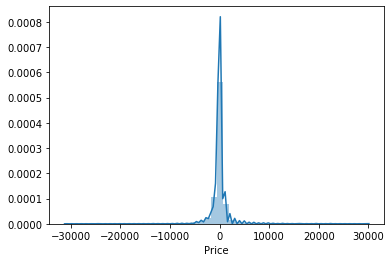

In [146]:
# Display a distribution plot for predicted price values.
sns.distplot(y_test-xg_pred)

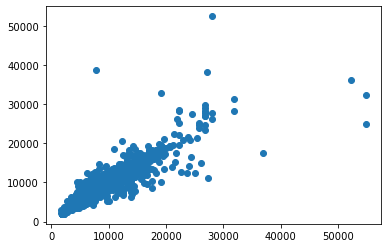

In [147]:
# Display a scatter plot for predicted price values.
plt.scatter(y_test,xg_pred)

In [148]:
import pickle
# Open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)

In [149]:
#Loading model to compare results
model = open('flight_rf.pkl', 'rb')
xg_r = pickle.load(model)

In [150]:
# Predict the outcome value of price for the test data.
y_prediction = xg_r.predict(X_test)

In [151]:
# Display the results for the optimized regression model.
print("Test Results for XGBoost Model (after hyper-parameter optimization):")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_prediction)))
print('Mean absolute error: ', metrics.mean_absolute_error(y_test,y_prediction))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_prediction)))
print("R-squared: ", r2_score(y_test, y_prediction))
print('Mean squared error: ', metrics.mean_squared_error(y_test,y_prediction))

Test Results for XGBoost Model (after hyper-parameter optimization):
--------------------------------------------------
Root mean squared error:  1709.9119444096762
Mean absolute error:  721.912983740683
Mean absolute % error:  8.0
R-squared:  0.8617942079394854
Mean squared error:  2923798.8576348796
